# Class 2. Intermediate Python & AI 

# Data Preparation

### Table of contents 

1. Data Cleaning 
    1. Remove irrelevant data    
    2. Deduplicate your data
    3. Fix structural errors
    4. Deal with missing data
    5. Filter out data outliers
    6. Validate your data
2. Data Exploration
    1. Preliminary Data Processing
    2. Categorical EDA 
    3. Numerical EDA 

In [84]:
import pandas as pd

#### We are going to use a new dataset of the grades of students in certain subjects

In [85]:
df = pd.read_csv('exams_mod.csv')

In [86]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [87]:
df.shape

(1010, 12)

In [88]:
df.describe()

,math score,reading score,writing score,id_student,address,Year,Age
count,1010.000000,1010.000000,1010.000000,1010.000000,0.0,1010.000000,943.000000
mean,66.420792,64.930693,70.289109,1494.599010,NaN,2021.104950,15.483563
std,15.481187,18.990769,19.125831,291.537945,NaN,7.681396,1.151707
min,13.000000,15.000000,23.000000,1000.000000,NaN,1990.000000,14.000000
25%,56.000000,54.000000,58.000000,1242.250000,NaN,2023.000000,14.000000
50%,66.000000,68.000000,68.000000,1494.500000,NaN,2023.000000,16.000000
75%,77.000000,78.000000,79.000000,1746.750000,NaN,2023.000000,17.000000
max,120.000000,100.000000,100.000000,1999.000000,NaN,2023.000000,17.000000


In [89]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
id_student                       int64
address                        float64
Year                             int64
Age                            float64
dtype: object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


## 0. Deduplicate your data

In [91]:
df.shape

(1010, 12)

In [92]:
df = pd.concat([df, df])
df.shape

(2020, 12)

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.shape

(1010, 12)

## 1. Data Cleaning

### A. Remove Irrelevant data

Look at the columns Year:

In [95]:
df['Year'].value_counts()

2023    952
1990     58
Name: Year, dtype: int64

The entries on year 1990 were introduced by mistake 

and we need to take them out of the dataset

In [96]:
df = df[df['Year'] != 1990]

In [97]:
df.shape

(952, 12)

What if the race/ethnicity group A would be irrelevant for the study. Could you build a new dataframe? 

In [98]:
df['race/ethnicity'].value_counts()

group C    310
group D    250
group B    191
group E    126
group A     75
Name: race/ethnicity, dtype: int64

In [99]:
ethnicity_df = df[df['race/ethnicity'] != 'group A']

In [100]:
ethnicity_df['race/ethnicity'].value_counts()

group C    310
group D    250
group B    191
group E    126
Name: race/ethnicity, dtype: int64

### B. Deduplicate your data

In [101]:
df.shape

(952, 12)

In [102]:
df.drop_duplicates(inplace=True)

In [103]:
df.shape

(952, 12)

### C. Fix Structural Errors

In [104]:
df['gender'].value_counts()

male      360
female    315
FEMALE     96
MALE       92
Male       48
Female     41
Name: gender, dtype: int64

In [105]:
df['gender'] = df['gender'].str.lower()
df['gender'].value_counts()

male      500
female    452
Name: gender, dtype: int64

The parental education level seems to have repeated degrees for high school. 

Can you make only one name for some highschool and high school?

In [106]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [107]:
df['parental level of education'].value_counts()

some college          215
high school           197
associate's degree    193
some high school      177
bachelor's degree     107
master's degree        63
Name: parental level of education, dtype: int64

In [108]:
df['parental level of education'].replace('some high school', 'high school', inplace=True)

In [109]:
df['parental level of education'].replace('some high school', 'high school').value_counts()

high school           374
some college          215
associate's degree    193
bachelor's degree     107
master's degree        63
Name: parental level of education, dtype: int64

### D. Missing values

Look at the columns address all of the values are missing

In [110]:
df.isna().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course          0
math score                       0
reading score                    0
writing score                    0
id_student                       0
address                        952
Year                             0
Age                             62
dtype: int64

In [111]:
df.drop(['address'], axis=1, inplace=True)

In [112]:
df['Age'].mean()

15.496629213483146

In [113]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [27]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
id_student                     0
Year                           0
Age                            0
dtype: int64

### E. Data Outliers

In [115]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


In [116]:
df.describe()

,math score,reading score,writing score,id_student,Year,Age
count,952.000000,952.000000,952.000000,952.000000,952.0,952.000000
mean,66.260504,64.728992,69.961134,1496.940126,2023.0,15.496629
std,15.528861,19.015962,19.160992,289.792695,0.0,1.113199
min,13.000000,15.000000,23.000000,1000.000000,2023.0,14.000000
25%,55.000000,53.000000,57.000000,1247.500000,2023.0,14.000000
50%,66.000000,67.000000,67.500000,1501.500000,2023.0,15.496629
75%,77.000000,78.000000,79.000000,1746.250000,2023.0,16.000000
max,120.000000,100.000000,100.000000,1999.000000,2023.0,17.000000


In [118]:
corrected_df = df[df['math score'] <= 100]

In [119]:
corrected_df['math score'].max()

100

In [123]:
df = df[df['math score'] <= 100]

In [124]:
aa = df[df['math score'] > 100].index

In [125]:
aa

Int64Index([], dtype='int64')

In [126]:
df.drop(labels=aa, axis=0, inplace=True)

In [127]:
df.describe()

,math score,reading score,writing score,id_student,Year,Age
count,951.000000,951.000000,951.000000,951.000000,951.0,951.000000
mean,66.203996,64.705573,69.929548,1497.451104,2023.0,15.496100
std,15.438790,19.012228,19.146259,289.515765,0.0,1.113665
min,13.000000,15.000000,23.000000,1000.000000,2023.0,14.000000
25%,55.000000,53.000000,57.000000,1248.500000,2023.0,14.000000
50%,66.000000,67.000000,67.000000,1502.000000,2023.0,15.496629
75%,77.000000,78.000000,79.000000,1746.500000,2023.0,16.000000
max,100.000000,100.000000,100.000000,1999.000000,2023.0,17.000000


## 2. Data Exploration

### A. Preliminary Data Processing

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       951 non-null    object 
 1   race/ethnicity               951 non-null    object 
 2   parental level of education  951 non-null    object 
 3   lunch                        951 non-null    object 
 4   test preparation course      951 non-null    object 
 5   math score                   951 non-null    int64  
 6   reading score                951 non-null    int64  
 7   writing score                951 non-null    int64  
 8   id_student                   951 non-null    int64  
 9   Year                         951 non-null    int64  
 10  Age                          951 non-null    float64
dtypes: float64(1), int64(5), object(5)
memory usage: 89.2+ KB


In [44]:
df['id_student'] = df['id_student'].astype('str')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       951 non-null    object 
 1   race/ethnicity               951 non-null    object 
 2   parental level of education  951 non-null    object 
 3   lunch                        951 non-null    object 
 4   test preparation course      951 non-null    object 
 5   math score                   951 non-null    int64  
 6   reading score                951 non-null    int64  
 7   writing score                951 non-null    int64  
 8   id_student                   951 non-null    object 
 9   Year                         951 non-null    int64  
 10  Age                          951 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 89.2+ KB


In [46]:
df['Age'].value_counts()

14.000000    243
17.000000    235
16.000000    214
15.000000    197
15.496629     62
Name: Age, dtype: int64

### B. Categorical EDA 

In [47]:
df['race/ethnicity'].value_counts()

group C    310
group D    249
group B    191
group E    126
group A     75
Name: race/ethnicity, dtype: int64

<AxesSubplot:>

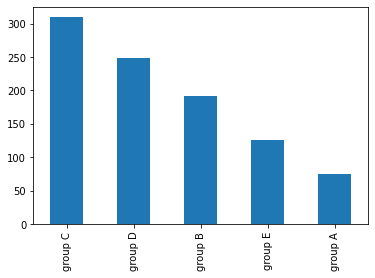

In [48]:
df['race/ethnicity'].value_counts().plot(kind='bar')

<AxesSubplot:>

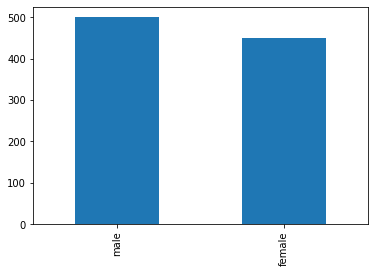

In [49]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

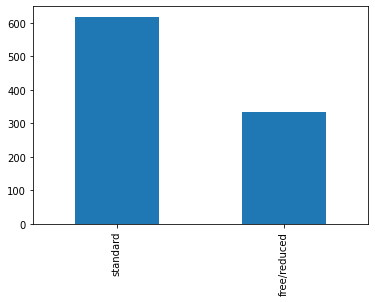

In [50]:
df['lunch'].value_counts().plot(kind='bar')

In [51]:
df['test preparation course'].value_counts()

none         639
completed    312
Name: test preparation course, dtype: int64

<AxesSubplot:>

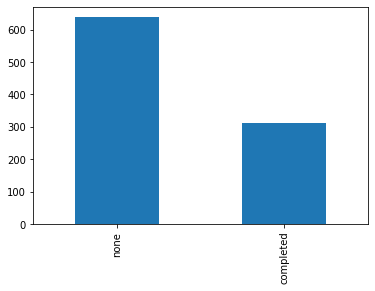

In [52]:
df['test preparation course'].value_counts().plot(kind='bar')

In [53]:
import matplotlib.pyplot as plt

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       951 non-null    object 
 1   race/ethnicity               951 non-null    object 
 2   parental level of education  951 non-null    object 
 3   lunch                        951 non-null    object 
 4   test preparation course      951 non-null    object 
 5   math score                   951 non-null    int64  
 6   reading score                951 non-null    int64  
 7   writing score                951 non-null    int64  
 8   id_student                   951 non-null    object 
 9   Year                         951 non-null    int64  
 10  Age                          951 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 89.2+ KB


In [55]:
df['math score'].dtype

dtype('int64')

gender


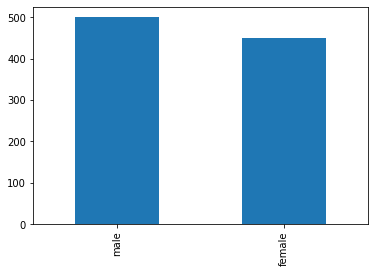

race/ethnicity


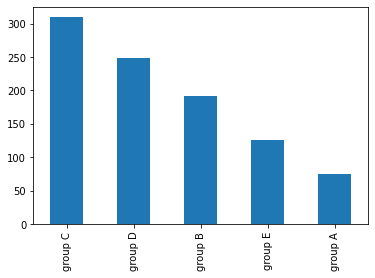

parental level of education


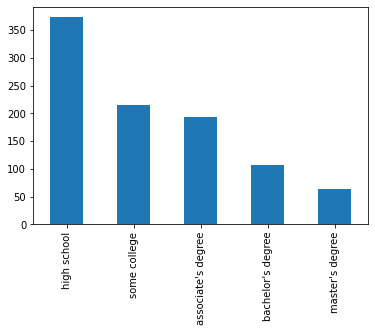

lunch


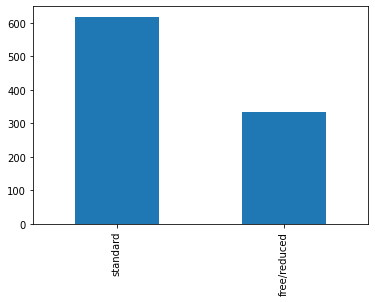

test preparation course


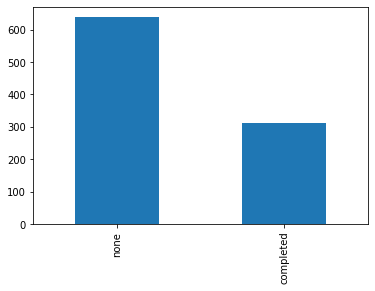

id_student


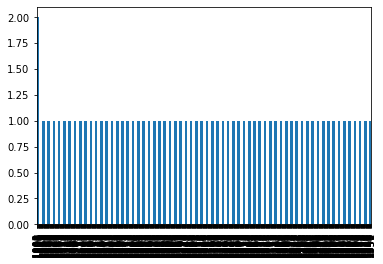

In [56]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col].value_counts().plot(kind='bar')
        print(col)
        plt.show()

### C. Numerical EDA

#### a. Distributions

In [57]:
df.describe()

,math score,reading score,writing score,Year,Age
count,951.000000,951.000000,951.000000,951.0,951.000000
mean,66.203996,64.705573,69.929548,2023.0,15.496100
std,15.438790,19.012228,19.146259,0.0,1.113665
min,13.000000,15.000000,23.000000,2023.0,14.000000
25%,55.000000,53.000000,57.000000,2023.0,14.000000
50%,66.000000,67.000000,67.000000,2023.0,15.496629
75%,77.000000,78.000000,79.000000,2023.0,16.000000
max,100.000000,100.000000,100.000000,2023.0,17.000000


<AxesSubplot:ylabel='Frequency'>

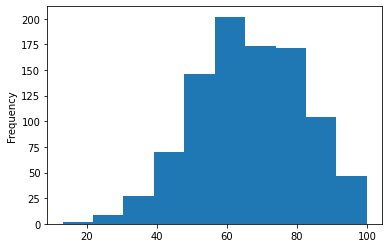

In [58]:
df['math score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

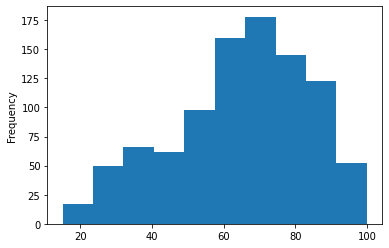

In [59]:
df['reading score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

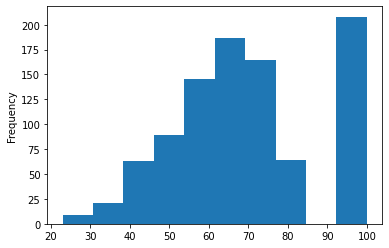

In [60]:
df['writing score'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

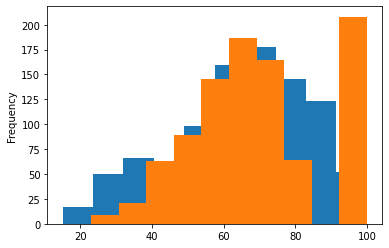

In [61]:
df['reading score'].plot(kind='hist')
df['writing score'].plot(kind='hist')

## Save dataset that you have been modifying (Important!!!)

In [62]:
df.to_csv('../../datasets/exams_mod_cleaned.csv', index=None)